# NCDS Analysis
## ...

### Starting the project

Visualizing data and converting to pandas dataset

In [80]:
%load_ext autoreload
%autoreload
%matplotlib inline

import numpy as np
import pandas as pd
import convert_data
import seaborn as sns
import matplotlib.pyplot as plt
from constants import *

filename = 'original_data/BSAG.dat'

df = convert_data.convert_tab_to_pandas(filename)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
df = df.replace(to_replace=9,value=0)
# Replace missing valus with NaN
df = df.replace(to_replace=-999,value='NaN')
df.head(3)

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n490,n492,...,n337,n910,n911,n914,n917,n920,n923,n926,n929,n1857
0,N10001N,2,0,0,0,0,23,4,12,5,...,57,5,69,22,26,48,16,21,8,-1
1,N10002P,1,0,8,8,8,34,4,1,4,...,58,5,69,28,31,59,18,27,12,-1
2,N10003Q,1,4,4,4,4,34,4,1,4,...,54,5,69,21,17,38,17,8,8,-1


### Extracting NCDS1 from dataset

In [82]:
# extract a sub dataset only with NCDS1 BSAG data
# 12 measures
ncds1_df = df.loc[:, NCDS1_BSAG]
ncds1_df.head(7)

,n455,n432,n434,n436,n438,n440,n442,n444,n446,n448,n450,n452,n454
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,5,1,7,0,1,0,0,2,1,3,1,0
3,3,0,0,1,2,0,0,0,0,0,0,0,0
4,4,2,0,0,1,0,1,0,0,0,0,0,0
5,16,5,2,1,0,0,0,0,0,1,5,1,1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replacing missing value with mean

In [115]:
import numpy as np
from sklearn.preprocessing import Imputer

X_all = np.array(ncds1_df[NCDS1_BSAG[1:]])

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_all = imp.fit_transform(X_all)

# convert back to df to display
new_df = pd.DataFrame(X_all, columns=NCDS1_BSAG[1:])
display(new_df.describe())

,n432,n434,n436,n438,n440,n442,n444,n446,n448,n450,n452,n454
count,18559.00000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000,18559.000000
mean,1.64590,0.293744,0.934327,0.830665,0.697699,0.833323,0.269562,0.236370,0.226854,1.287391,0.549692,0.103857
std,2.07105,0.777764,1.414642,1.419722,1.514512,1.404588,0.715597,0.746735,0.592333,1.743014,0.931602,0.421408
min,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.934327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.00000,0.293744,1.000000,1.000000,0.697699,1.000000,0.269562,0.236370,0.226854,1.287391,1.000000,0.103857
max,15.00000,10.000000,14.000000,12.000000,18.000000,16.000000,8.000000,8.000000,4.000000,12.000000,7.000000,7.000000


### PCA
#### Correlation

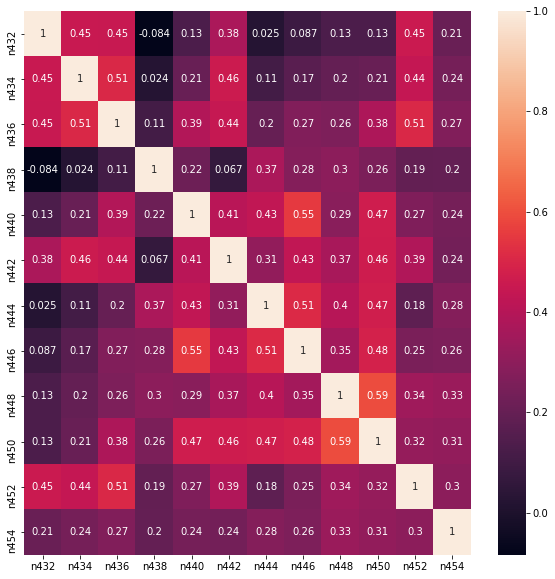

In [116]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True)

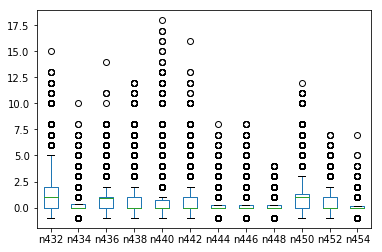

In [117]:
new_df.plot.box()

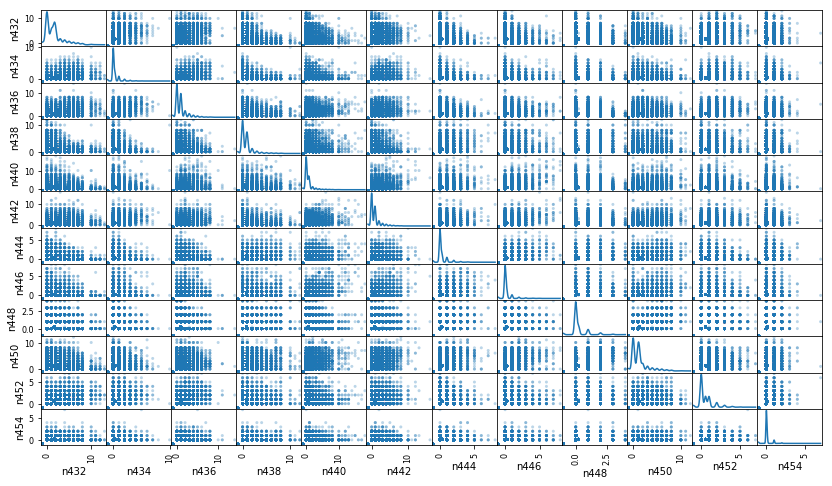

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_all, test_size=0.25, shuffle=False)

X_train = pd.DataFrame(X_train, columns=NCDS1_BSAG[1:])
X_test = pd.DataFrame(X_test, columns=NCDS1_BSAG[1:])

# Escalone os dados utilizando o algoritmo natural
# log_data = X_train.apply(np.log)

# Escalone a amostra de dados utilizando o algoritmo natural
# log_samples = X_test.apply(np.log)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(X_train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [122]:
from sklearn.decomposition import PCA
# Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=8)
pca.fit(X_train)

# Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(X_test)

explained_var=pca.explained_variance_ratio_

print "Primeiros dois componentes " + str(np.sum([explained_var[:1]]))
print "Primeiros quatro componentes " + str(np.sum([explained_var[0:3]]))
print "Primeiros seis componentes " + str(np.sum([explained_var[0:5]]))
print "Todos " + str(np.sum([explained_var]))

Primeiros dois componentes 0.395521907936
Primeiros quatro componentes 0.705299102968
Primeiros seis componentes 0.84611345739
Todos 0.950077451994


In [123]:
# TAplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=4)
pca.fit(X_train)

# Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(X_train)

# Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(X_test)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])

pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4']).head(5)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,-2.6943,0.0776,-0.5738,0.2825
1,-5.6698,-0.5817,-1.2799,0.0967
2,1.4154,-4.6697,2.0722,-0.4221
3,-2.4637,0.7746,1.1996,0.3212
4,3.4692,0.2019,-1.4871,-0.5958


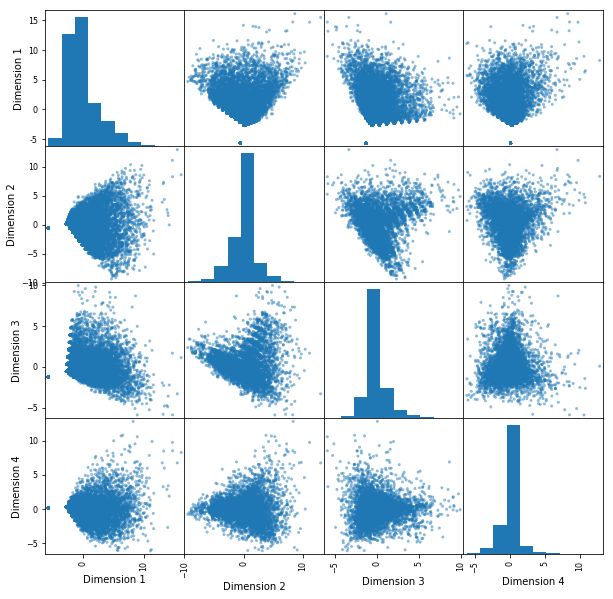

In [124]:
pd.plotting.scatter_matrix(reduced_data, figsize = (10,10));

In [149]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusters = [2, 3, 4, 5]
scores = []
score = 0

bic = []
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_cluster in clusters:
        # Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
        clusterer = GaussianMixture(n_components = n_cluster, covariance_type=cv_type, random_state = 42)
        clusterer.fit(reduced_data)

        # Preveja o cluster para cada ponto de dado
        preds = clusterer.predict(reduced_data)

        # Ache os centros do cluster
        centers = clusterer.means_

        # Preveja o cluster para cada amostra de pontos de dado transformados
        sample_preds = clusterer.predict(pca_samples)

        # Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
        current_score = silhouette_score(reduced_data, preds, sample_size=3000)    
        scores.append(current_score)
        
        current_bic = clusterer.bic(reduced_data)
        bic.append(current_bic)
        print 'BIC: ' + str(current_bic) + '  ' + cv_type + '  score: ' + str(current_score) + ' n=' + str(n_cluster)


for index in range(len(clusters)):
    print 'Numero de cluster: ' + str(clusters[index]) + ' score: ' + str(scores[index])

# refazendo com o melhor Score
clusterer = GaussianMixture(n_components = 2, random_state = 42, covariance_type='tied')
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds, sample_size=3000)

print '\nMelhor Score: ' + str(score)
print 'Melhor BIC: ' + str(bic[4])

BIC: 195979.130107  spherical  score: 0.371120485457 n=2
BIC: 192444.237775  spherical  score: 0.34961529433 n=3
BIC: 190998.363034  spherical  score: 0.346542093154 n=4
BIC: 190347.820581  spherical  score: 0.302842560498 n=5
BIC: 211087.748807  tied  score: 0.526445009192 n=2
BIC: 207125.429204  tied  score: 0.469311789695 n=3
BIC: 199888.738205  tied  score: 0.470499273218 n=4
BIC: 196050.683325  tied  score: 0.493757187605 n=5
BIC: 182928.78926  diag  score: 0.314658874777 n=2
BIC: 179098.053879  diag  score: 0.32802596885 n=3
BIC: 171342.476508  diag  score: 0.0562096682902 n=4
BIC: 169941.868474  diag  score: 0.0814765348432 n=5
BIC: 178685.761323  full  score: 0.217139988396 n=2
BIC: 125650.388937  full  score: 0.0367494393766 n=3
BIC: 78342.8697666  full  score: 0.0635069392762 n=4
BIC: 23962.6745917  full  score: 0.0860944959589 n=5
Numero de cluster: 2 score: 0.371120485457
Numero de cluster: 3 score: 0.34961529433
Numero de cluster: 4 score: 0.346542093154
Numero de cluster:

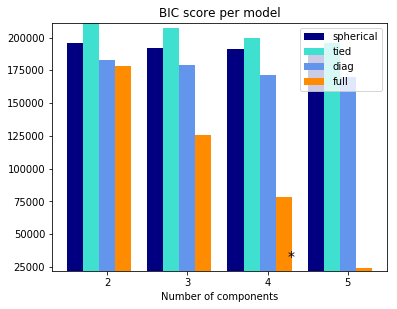

In [189]:
# Plot the BIC scores
import itertools
from scipy import linalg

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])

bars = []
bic = np.array(bic)

spl = plt.plot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(clusters) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(clusters):
                                  (i + 1) * len(clusters)],
                        width=.2, color=color))
plt.xticks(clusters)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(clusters)) + .65 +\
    .2 * np.floor(bic.argmin() / len(clusters))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)


plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

### End